# 신경망의 구조
- 네트워크(또는 모델)를 구성하는 층
- 입력 데이터와 그에 상응하는 타깃
- 학습에 사용할 피드백 신호를 정의하는 손실 함수
- 학습 진행 방식을 결정하는 옵티마이저

## 층: 딥러닝의 구성 단위
- 2D 텐서는 Dense 층으로 처리한다.
- 3D 텐서는 LSTM과 같은 순환 층으로 처리한다.
- 4D 텐서는 2D 합성곱 층으로 처리한다.

In [1]:
from keras import layers

layer = layers.Dense(32, input_shape=(784,))

W0929 15:52:48.097758  9068 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [2]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(10))

W0929 15:53:37.237820  9068 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0929 15:53:37.242841  9068 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



## 모델: 층의 네트워크
- 가지가 2개인 네트워크
- 출력이 여러 개인 네트워크
- 인셉션 블록

## 손실 함수와 옵티마이저: 학습 과정을 조절하는 열쇠
- 손실 함수(목적 함수): 훈련하는 동안 최소화될 값입니다. 주어진 문제에 대한 성공 지표가 됩니다.
- 옵티마이저: 손실 함수를 기반으로 네트워크가 어떻게 업데이트될지 결정합니다. 특정 종류의 확률적 경사 하강법을 구현합니다.

# 케라스 소개

## 케라스를 사용한 개발: 빠르게 둘러보기
1. 입력 텐서와 타깃 텐서로 이루어진 훈련 데이터를 정의합니다.
2. 입력과 타깃을 매핑하는 층으로 이루어진 네트워크(또는 모델)를 정의합니다.
3. 손실 함수, 옵티마이저, 모니터링하기 위한 측정 지표를 선택하여 학습 과정을 설정합니다.
4. 훈련 데이터에 대해 모델의 fit() 메서드를 반복적으로 호출합니다.

In [1]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

Using TensorFlow backend.
W1003 14:33:24.712119 13320 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1003 14:33:24.757117 13320 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1003 14:33:24.773075 13320 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [2]:
# 위와 동일하지만 함수형으로 만듦
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [3]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='mse',
             metrics=['accuracy'])

W1003 14:35:45.793257 13320 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [4]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

NameError: name 'target_tensor' is not defined

# 영화 리뷰 분류: 이진 분류 예제

## IMDB 데이터셋

In [1]:
import numpy as np 
np_load_old = np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # 패딩, 문서시작, 사전에없음 이기 때문에 3을 뺀다

## 데이터 준비
리스트를 텐서로 바꾸는 두 가지 방법
- 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환합니다. 그다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용합니다(Embedding 층을 말함)
- 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환합니다. 예를 들어 시퀀스 [3,5]를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환합니다. 그다음 부동 소수 벡터 데이터를 다룰수 있는 Dense 층을 신경망의 첫 번째 층으로 사용합니다.

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
# np.array는 복사본 / np.asarray는 참조본이다. -> 참조본은 수정 시 원본이 변경된다.

## 신경망 모델 만들기

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W1003 16:36:52.681783 13320 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1003 16:36:52.716781 13320 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1003 16:36:52.726780 13320 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

W1003 16:38:18.546266 13320 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1003 16:38:18.569295 13320 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1003 16:38:18.574299 13320 deprecation.py:323] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [9]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

## 훈련 검증

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

W1003 16:42:07.058865 13320 deprecation_wrapper.py:119] From C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 226us/step - loss: 0.5074 - acc: 0.7839 - val_loss: 0.3792 - val_acc: 0.8698
Epoch 2/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.3001 - acc: 0.9049 - val_loss: 0.3001 - val_acc: 0.8898
Epoch 3/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.2178 - acc: 0.9283 - val_loss: 0.3086 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.1749 - acc: 0.9440 - val_loss: 0.2840 - val_acc: 0.8840
Epoch 5/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.1424 - acc: 0.9542 - val_loss: 0.2853 - val_acc: 0.8858
Epoch 6/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.1149 - acc: 0.9651 - val_loss: 0.3125 - val_acc: 0.8787
Epoch 7/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.0977 - acc: 0.9709 - val_loss: 0.3130 - 

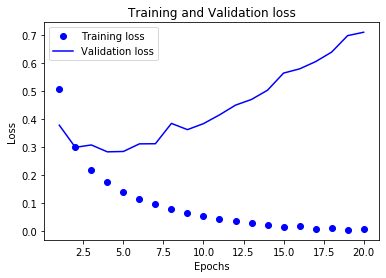

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

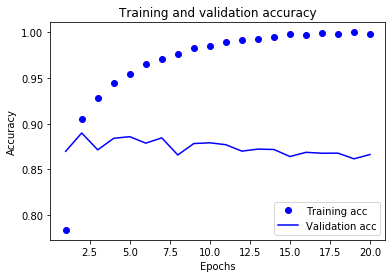

In [13]:
plt.clf() # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 125us/step - loss: 0.4732 - acc: 0.8224
Epoch 2/4
25000/25000 [==============================] - 3s 105us/step - loss: 0.2658 - acc: 0.9097 1s - l
Epoch 3/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.1983 - acc: 0.9290
Epoch 4/4
25000/25000 [==============================] - 3s 138us/step


In [15]:
results

[0.3218541938781738, 0.87324]

## 훈련된 모델로 새로운 데이터에 대해 예측하기

In [16]:
model.predict(x_test)

array([[0.1379362 ],
       [0.99972016],
       [0.2813297 ],
       ...,
       [0.07243988],
       [0.04248384],
       [0.4507938 ]], dtype=float32)

## 추가 실험
- 여기에서는 2개의 은닉 층을 사용했습니다. 1개 또는 3개의 은닉 층을 사용하고 검증과 테스트 정확도에 어떤 영향을 미치는지 확인해 보세요.
- 층의 은닉 유닛을 추가하거나 줄여 보세요. 32개의 유닛, 64개의 유닛 등
- binary_crossentropy 대신에 mse 손실 함수를 사용해 보세요.
- relu 대신에 tanh 활성화 함수(초창기 신경망에서 인기 있었던 함수)를 사용해 보세요.

## 정리
- 원본 데이터를 신경망에 텐서로 주입하기 위해서는 꽤 많은 전처리가 필요합니다. 단어 시퀀스는 이진 벡터로 인코딩될 수 있고 다른 인코딩 방식도 있습니다.
- relu 활성화 함수와 함께 Dense 층을 쌓은 네트워크는 (감성 분류를 포함하여) 여러 종류의 문제에 적용할 수 있어 앞으로 자주 사용하게 될 것입니다.
- (출력 클래스가 2개인) 이진 분류 문제에서 네트워크는 하나의 유닛과 sigmoid 활성화 함수를 가진 Dense 층으로 끝나야 합니다. 이 신경망의 출력은 확률을 나타내는 0과 1 사이의 스칼라 값입니다.
- 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 함수는 binary_crossentropy입니다.
- rmsprop 옵티마이저는 문제에 상관없이 일반적으로 충분히 좋은 선택입니다. 걱정할 거리가 하나 줄은 셈입니다.
- 훈련 데이터에 대해 성능이 향상됨에 따라 신경망은 과대적합되기 시작하고 이전에 본적 없는 데이터에서는 결과가 점점 나빠지게 됩니다. 항상 훈련 세트 이외의 데이터에서 성능을 모니터링해야 합니다.